# Logistic Regression for Heart Disease Prediction


### Mathematical Foundation

Logistic regression predicts a binary outcome (1 or 0) based on one or more predictor variables. It models the relationship between the independent variables (X) and the probability (P) of the target outcome being 1.

---

#### Logistic Function (Sigmoid Function):
The logistic function maps any real-valued number to a range between 0 and 1.

**Formula:**
P(Y=1|X) = 1 / (1 + exp(-z))

Where:
- `z = β0 + β1 * X1 + β2 * X2 + ... + βn * Xn`
- `β0`: Intercept (bias term)
- `β1, β2, ..., βn`: Coefficients for the predictor variables.

---

#### Log-Odds (Logit) Transformation:
The logit function is the natural logarithm of the odds (P / (1 - P)):

**Formula:**
Logit(P) = log(P / (1 - P)) = β0 + β1 * X1 + β2 * X2 + ... + βn * Xn

---

#### Decision Boundary:
- The predicted probability (P) is compared to a threshold (usually 0.5) to classify the outcome:
  - If P ≥ 0.5, classify as Y = 1.
  - If P < 0.5, classify as Y = 0.

---

#### Cost Function (Log Loss):
To train a logistic regression model, the coefficients (β) are optimized by minimizing the **log loss** function:

**Formula:**
Log Loss = -(1 / N) * Σ[yi * log(Pi) + (1 - yi) * log(1 - Pi)]

Where:
- `N`: Number of samples
- `yi`: Actual target value (0 or 1)
- `Pi`: Predicted probability for sample i

---

#### Gradient Descent:
The optimization algorithm, such as gradient descent, is used to minimize the log loss by iteratively updating the coefficients:

**Formula:**
βj = βj - η * (∂Log Loss / ∂βj)

Where:
- `η`: Learning rate
- `(∂Log Loss / ∂βj)`: Gradient of the cost function with respect to βj

---


## 1. Objective
The primary objective of this notebook is to:
- Understand the concepts of Logistic Regression.
- Predict the presence of heart disease based on a given set of features.
- Evaluate the model using metrics like accuracy, confusion matrix, and ROC-AUC.
- Interpret the model's performance and gain insights from the data.

---

## 2. Dataset Overview
This dataset contains various medical attributes of patients and a target variable `target` indicating the presence of heart disease:
- `1`: Heart disease is present.
- `0`: No heart disease.

### Features Description:
1. **age**: Age of the patient.
2. **sex**: Gender of the patient (1 = male, 0 = female).
3. **cp**: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).
4. **trestbps**: Resting blood pressure (in mm Hg).
5. **chol**: Serum cholesterol level (in mg/dl).
6. **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
7. **restecg**: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
8. **thalach**: Maximum heart rate achieved.
9. **exang**: Exercise-induced angina (1 = yes, 0 = no).
10. **oldpeak**: ST depression induced by exercise relative to rest.
11. **slope**: Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
12. **ca**: Number of major vessels (0-3) colored by fluoroscopy.
13. **thal**: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect).
14. **target**: Presence of heart disease (1 = heart disease, 0 = no heart disease).

---

## 3. Import Libraries and Load Dataset


In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    auc,
)

# Load the dataset
path = "/content/heart.csv"  # Replace with dataset URL or path
data = pd.read_csv(path)

# Display the first few rows
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


---

## 4. Exploratory Data Analysis (EDA)

### Dataset Summary


In [5]:
# Check dataset information and missing values
print("Dataset Information:")
data.info()

print("\nMissing Values:\n", data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
data.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Insights:
- The dataset contains 14 columns and no missing values.
- Continuous features like `age`, `trestbps`, `chol`, and `thalach` have varying ranges that might need scaling.
- `target` is the dependent variable, with `1` indicating heart disease and `0` indicating no heart disease.

---

### Visualizations
#### 1. Distribution of the Target Variable


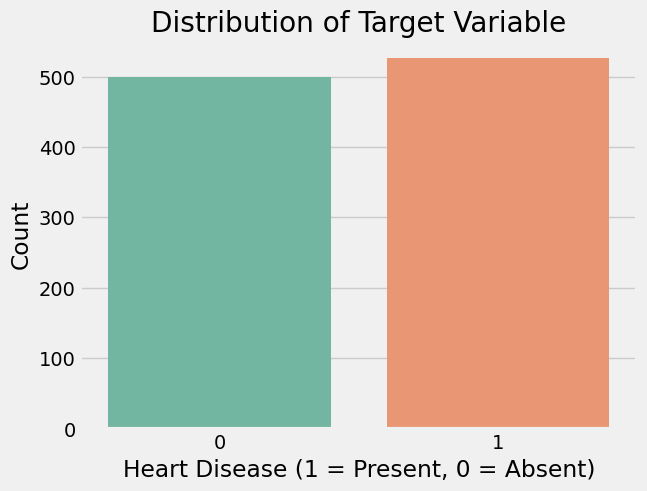

In [6]:
# Countplot for the target variable
sns.countplot(data=data, x="target", palette="Set2")
plt.title("Distribution of Target Variable")
plt.xlabel("Heart Disease (1 = Present, 0 = Absent)")
plt.ylabel("Count")
plt.show()


**Interpretation:**
- The dataset is moderately balanced, with a slightly higher count for `target=1` (patients with heart disease).
---

#### 2. Age Distribution


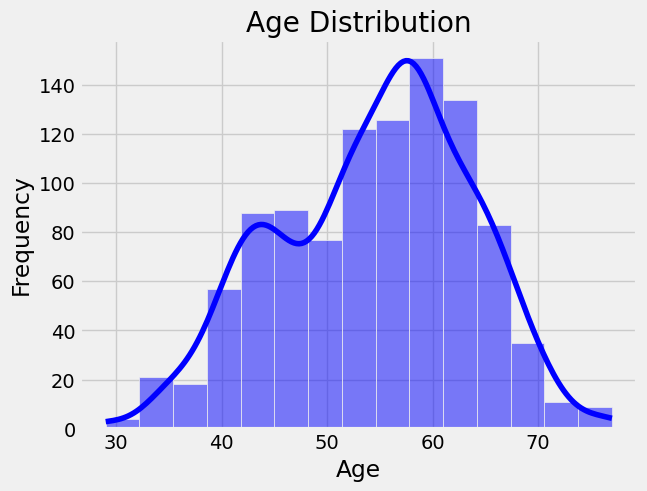

In [7]:
# Distribution of age
sns.histplot(data=data, x="age", bins=15, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


**Interpretation:**
- Most patients in the dataset are between 50 and 65 years old.
---

#### 3. Chest Pain Type vs Heart Disease

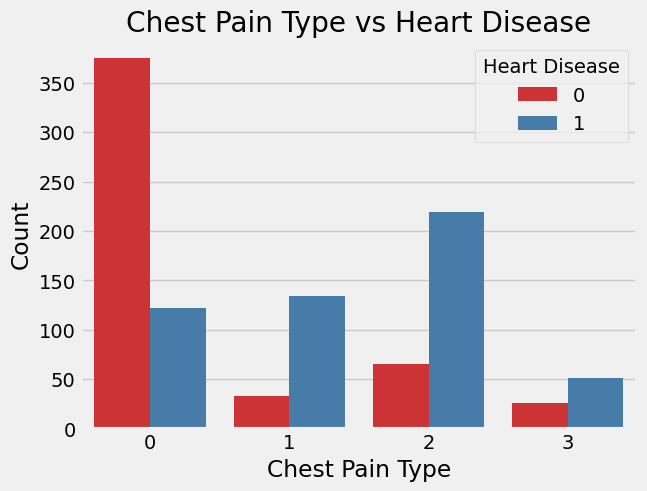

In [8]:
# Chest pain type vs target
sns.countplot(data=data, x="cp", hue="target", palette="Set1")
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease", loc="upper right")
plt.show()


**Interpretation:**
- Patients with non anginal chest pain (`cp=2`) are more likely to have heart disease (`target=1`).
---

**Additional viz**

#### 1. Gender vs Target


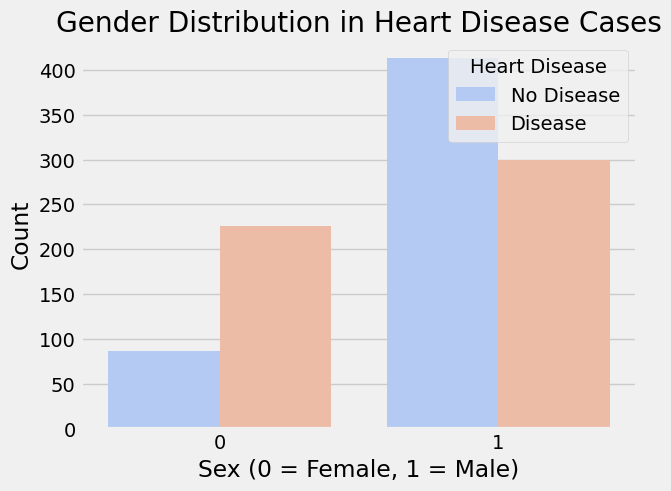

In [13]:
# Gender vs Target
sns.countplot(data=data, x="sex", hue="target", palette="coolwarm")
plt.title("Gender Distribution in Heart Disease Cases")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"], loc="upper right")
plt.show()


**Interpretation:**
- Males (sex=1) show a higher prevalence of heart disease compared to females (sex=0) in this dataset.
---

##### 2. Maximum Heart Rate Achieved (thalach) vs Heart Disease


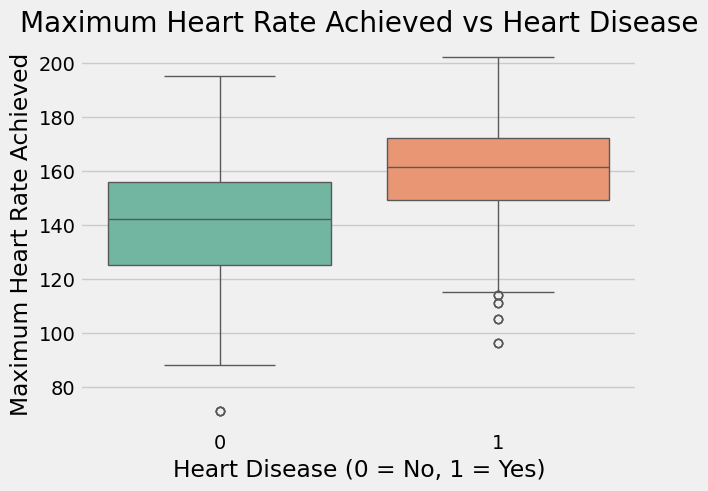

In [14]:
# Boxplot for thalach vs target
sns.boxplot(data=data, x="target", y="thalach", palette="Set2")
plt.title("Maximum Heart Rate Achieved vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()


**Interpretation:**
- Patients with no heart disease (`target=0`) tend to have lower maximum heart rates than those without heart disease.
---

##### 3. Cholesterol Levels (chol) Distribution by Heart Disease


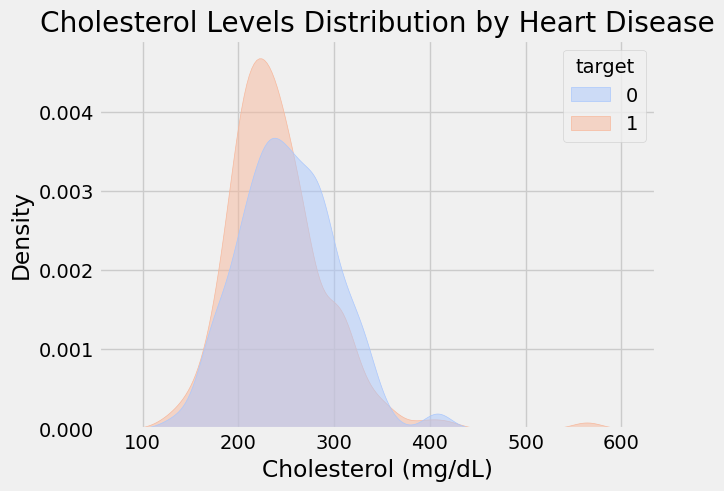

In [15]:
# Distribution of cholesterol levels for each target class
sns.kdeplot(data=data, x="chol", hue="target", fill=True, palette="coolwarm", alpha=0.5)
plt.title("Cholesterol Levels Distribution by Heart Disease")
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Density")
plt.show()


**Interpretation:**
- Patients without heart disease (`target=0`) tend to have a slightly wider distribution of cholesterol levels compared to patients with heart disease.
---

##### 4. Resting Blood Pressure (trestbps) Distribution by Heart Disease


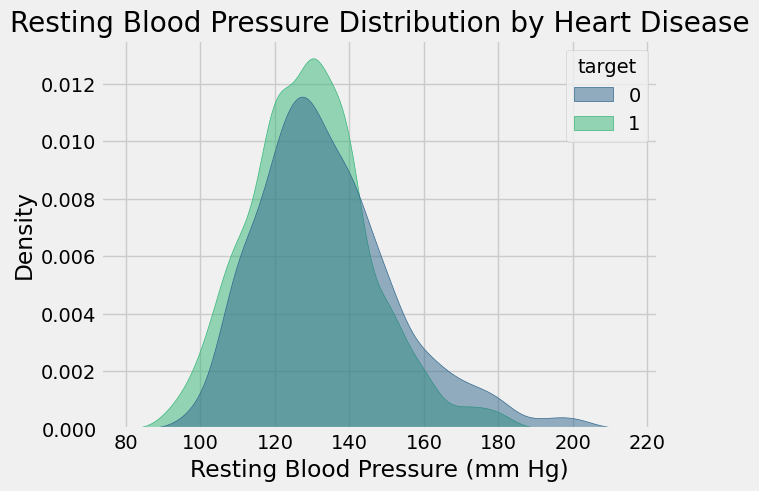

In [16]:
# KDE plot for trestbps by target
sns.kdeplot(data=data, x="trestbps", hue="target", fill=True, palette="viridis", alpha=0.5)
plt.title("Resting Blood Pressure Distribution by Heart Disease")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.ylabel("Density")
plt.show()


**Interpretation:**
- The resting blood pressure distribution is similar for both classes, indicating it may have a limited direct effect on predicting heart disease.
---

##### 5. Number of Major Vessels (ca) vs Heart Disease


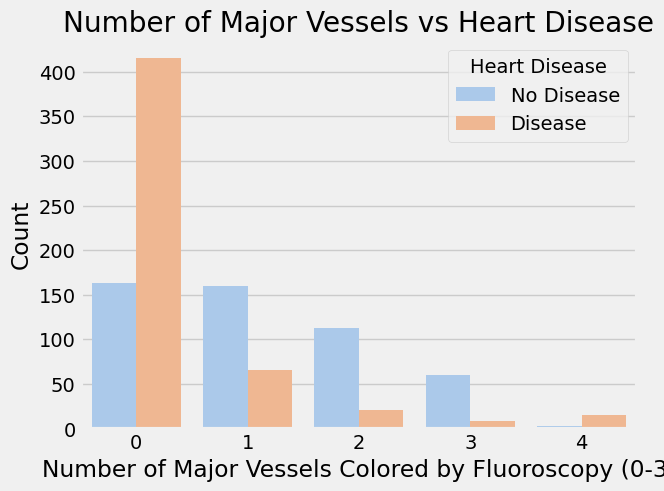

In [17]:
# Bar plot for ca vs target
sns.countplot(data=data, x="ca", hue="target", palette="pastel")
plt.title("Number of Major Vessels vs Heart Disease")
plt.xlabel("Number of Major Vessels Colored by Fluoroscopy (0-3)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"], loc="upper right")
plt.show()


**Interpretation:**
- Patients with no major vessels colored by fluoroscopy (`ca=0`) are more likely to have heart disease.
---

By incorporating these additional visualizations, we gain a deeper understanding of the relationships between features and the target variable.


**Pair Plot**

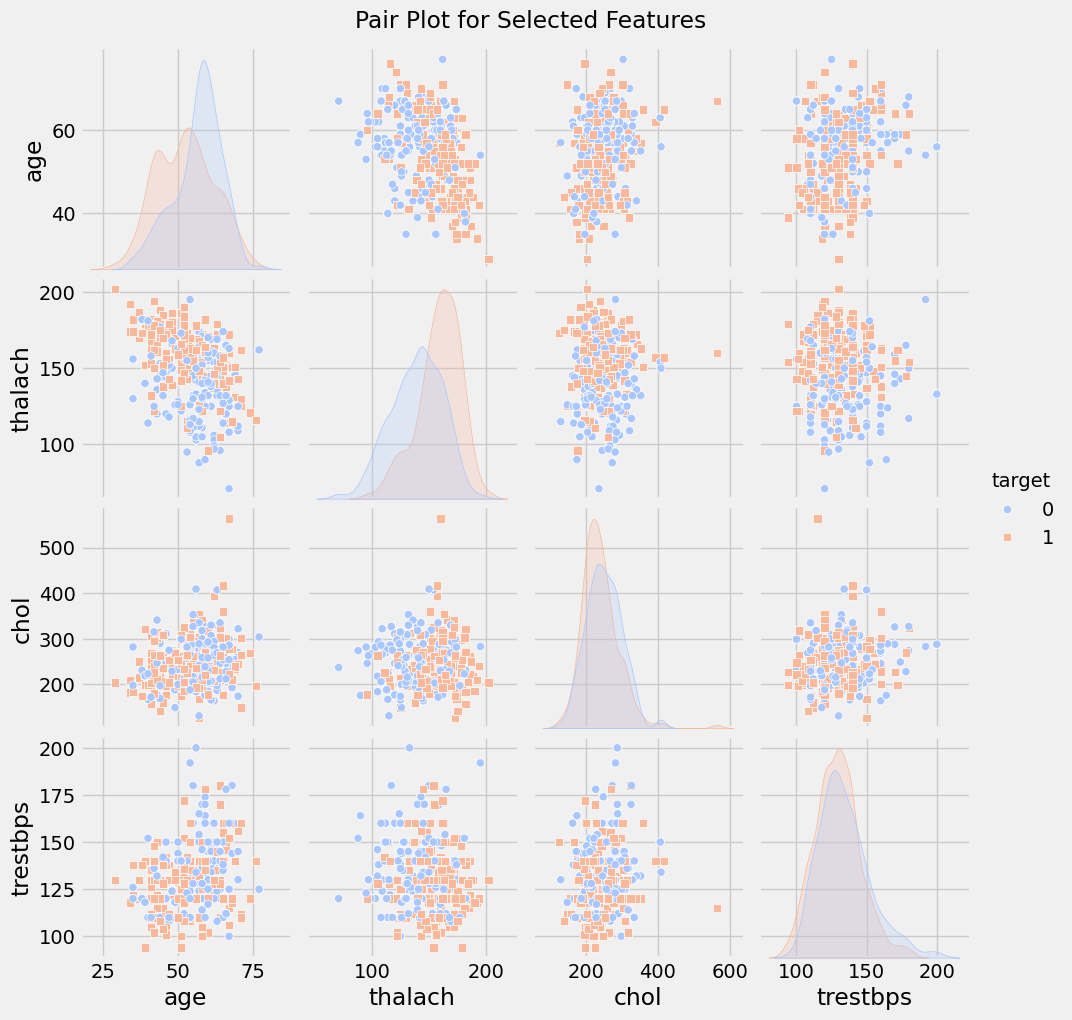

In [19]:
# Pair plot for selected features
selected_features = ["age", "thalach", "chol", "trestbps", "target"]
sns.pairplot(data[selected_features], hue="target", palette="coolwarm", diag_kind="kde", markers=["o", "s"])
plt.suptitle("Pair Plot for Selected Features", y=1.02)
plt.show()


### Diagonal Analysis
- **Diagonal plots (KDE)**: These represent the distribution of individual features.
  - `age`: The distribution of age is fairly uniform, with no strong skewness.
  - `thalach`: Higher maximum heart rates (`thalach`) are more commonly observed in patients with heart disease.
  - `chol`: The cholesterol levels have a wide range but show no clear separation between classes.
  - `trestbps`: The distribution is fairly similar across the two classes, indicating resting blood pressure may have limited predictive power.

---

### Off-Diagonal Analysis
- **Scatter Plots (Off-Diagonal):** These plots show pairwise relationships between features.
  - **`age` vs `thalach`:** Younger patients generally achieve higher heart rates, and heart disease is more prevalent in this group.
  - **`chol` vs `thalach`:** There is no strong visible correlation between cholesterol and maximum heart rate. Both features vary independently.
  - **`trestbps` vs `chol`:** There is a slight positive trend, but it doesn't strongly differentiate between patients with and without heart disease.
  - **`age` vs `chol`:** Cholesterol levels don't show a strong trend with age.

---

**Summary from Pair Plot:**
- `thalach` (maximum heart rate) shows a strong relationship with the target variable, indicating its potential as an important feature.
- `age`, `chol`, and `trestbps` show weaker relationships but may still contribute to predictions in combination with other features.


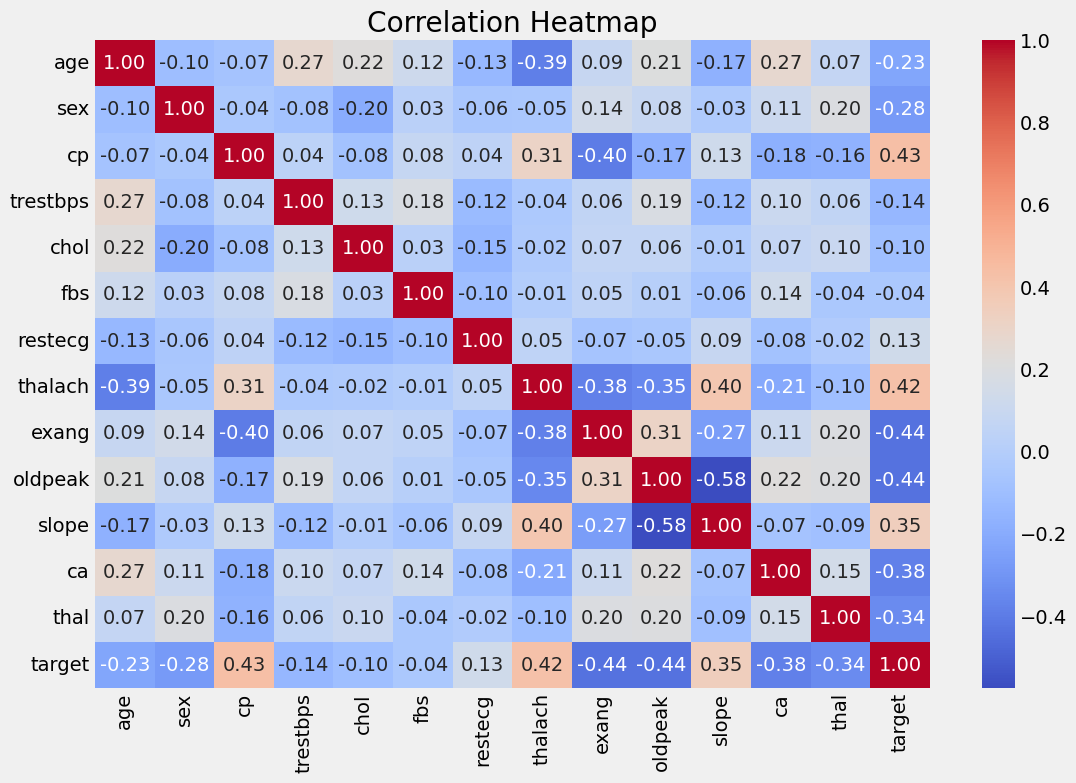

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Interpretation:**
- Features like `thalach` (max heart rate) and `cp` (chest pain type) have strong positive correlations with `target`.
- `oldpeak` and `ca` (number of major vessels) show a negative correlation with `target`.

---

## 5. Data Preprocessing
- Split the data into features (`X`) and target (`y`).
- Perform scaling on continuous features for better model performance.

---


In [10]:
  # Define features and target
X = data.drop("target", axis=1)
y = data["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


---

## 6. Model Training
We will train a Logistic Regression model using scikit-learn's `LogisticRegression` class.

---


In [11]:
# Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Display coefficients
coefficients = pd.DataFrame(
    {"Feature": data.columns[:-1], "Coefficient": log_reg.coef_[0]}
)
coefficients.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
2,cp,0.855489
7,thalach,0.438294
10,slope,0.353978
6,restecg,0.191038
5,fbs,0.053670
0,age,-0.120732
4,chol,-0.284776
3,trestbps,-0.404845
8,exang,-0.456145
12,thal,-0.523270


---

## 7. Model Evaluation

Evaluate the model using:
- Accuracy Score
- Confusion Matrix
- Classification Report
- ROC-AUC Curve

---


Accuracy: 0.82


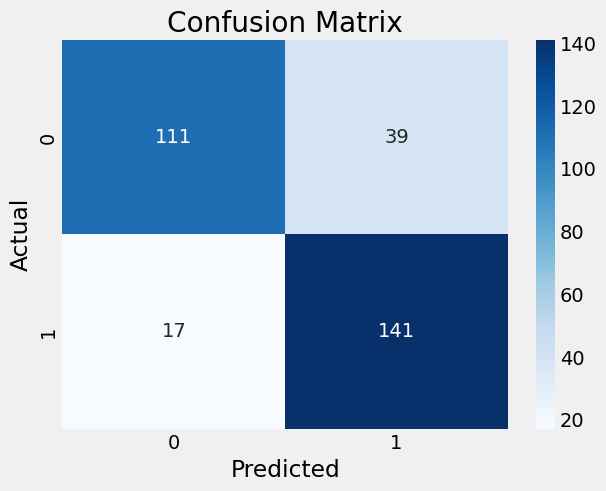

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       150
           1       0.78      0.89      0.83       158

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



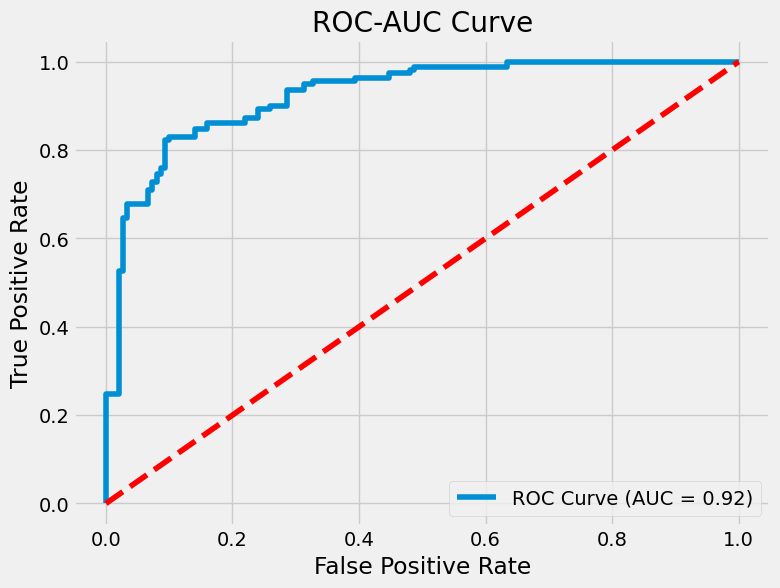

In [12]:
# Predictions and probabilities
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()


### Classification Report Interpretation

#### 1. **Precision:**
- **Precision for Class 0 (no heart disease)**: 0.87
  - This means that when the model predicts no heart disease, it is correct 87% of the time. A higher precision indicates fewer false positives.
  
- **Precision for Class 1 (heart disease)**: 0.78
  - This means that when the model predicts heart disease, it is correct 78% of the time. Although not as high as for class 0, it still indicates a reasonable level of correctness.

---

#### 2. **Recall (Sensitivity):**
- **Recall for Class 0 (no heart disease)**: 0.74
  - This means that 74% of the actual cases of no heart disease were correctly identified by the model. A lower recall value indicates that some patients with no heart disease were misclassified as having heart disease (false negatives).
  
- **Recall for Class 1 (heart disease)**: 0.89
  - This indicates that the model correctly identified 89% of patients with heart disease. A higher recall value means that fewer heart disease cases were missed by the model (fewer false negatives).

---

#### 3. **F1-Score:**
- **F1-Score for Class 0 (no heart disease)**: 0.80
  - The F1-score is the harmonic mean of precision and recall. An F1-score of 0.80 for class 0 indicates a good balance between precision and recall for identifying patients with no heart disease.
  
- **F1-Score for Class 1 (heart disease)**: 0.83
  - The F1-score of 0.83 for class 1 indicates that the model is slightly better at balancing precision and recall for detecting heart disease.

---

#### 4. **Accuracy:**
- **Overall Accuracy**: 0.82 (82%)
  - The model is correctly classifying 82% of all instances (both heart disease and non-heart disease cases). This is a decent overall performance, indicating that the model has learned well to distinguish between the two classes.

---

#### 5. **Macro Average:**
- **Macro Average Precision**: 0.83
  - This is the average of precision values for both classes (without considering class imbalance). A value of 0.83 indicates a good overall precision across both classes.
  
- **Macro Average Recall**: 0.82
  - The macro average recall is 0.82, showing a balanced performance in identifying both classes across the dataset.
  
- **Macro Average F1-Score**: 0.82
  - The macro average F1-score of 0.82 also reflects a good balance between precision and recall for both classes.

---

#### 6. **Weighted Average:**
- **Weighted Average Precision**: 0.82
  - The weighted average precision considers the proportion of each class in the dataset. The result of 0.82 suggests that the model's precision is relatively well-balanced for both classes.
  
- **Weighted Average Recall**: 0.82
  - The weighted recall of 0.82 indicates that the model does not have significant bias toward either class in terms of recall.
  
- **Weighted Average F1-Score**: 0.82
  - The weighted average F1-score of 0.82 reflects a balanced performance across both classes, accounting for the number of instances of each class in the dataset.

---

### Summary:

- **Precision** for class 0 (no heart disease) is higher than for class 1 (heart disease), meaning the model is more reliable when predicting no heart disease.
- **Recall** for class 1 (heart disease) is higher, indicating that the model is better at identifying patients with heart disease (fewer false negatives).
- **Accuracy** of 82% shows the overall correctness of the model.
- The **F1-scores** for both classes indicate a good balance between precision and recall, with the model performing better for class 1 (heart disease).
- The **macro and weighted averages** reinforce that the model performs fairly well across both classes, with slight preference towards class 1 (heart disease).

Overall, the model is performing quite well, but there is still room for improvement, particularly in terms of increasing precision for heart disease predictions (class 1).


---

## 8. Learnings

1. Logistic Regression is effective for binary classification tasks like predicting heart disease.
2. The coefficients provide insights into the relationship between features and the target.
3. Model evaluation using metrics like accuracy, confusion matrix, and ROC-AUC ensures a thorough performance analysis.
4. Scaling continuous features enhances model performance.

---
